calculate patristic distance matrices for host tree

In [1]:
setwd('/public/home/lyx/00.16S/00BR/00.bamboorat/phyloseq/')
list.files()

[1] "alpha_div.rds"                      "alpha_habitat.pdf"                 
 [3] "alpha_Observed_MRM.pdf"             "alpha_pgls.pdf"                    
 [5] "alpha_Shannon_MRM.pdf"              "alpha_species.pdf"                 
 [7] "ASV_species.xls"                    "ASV_table.tsv"                     
 [9] "beta_div.rds"                       "bray_distance.xls"                 
[11] "bray_MRM.pdf"                       "bray_pcoa.pdf"                     
[13] "bray_pgls.pdf"                      "dna-sequences.fasta"               
[15] "Enterotypes_bamboo.pdf"             "filtered-table.tsv"                
[17] "genus_lefse_Bathyergidae.pdf"       "genus_lefse_habitat.pdf"           
[19] "genus_lefse_Spalacidae.pdf"         "host_tree_exp_dist.RDS"            
[21] "host_tree_exp.nwk"                  "host_tree.nwk"                     
[23] "host_tree.pdf"                      "host_tree.png"                     
[25] "init.R"                             "metadata.txt"                      
[27] "otu_genus.xls"                      "otu_phylum.xls"                    
[29] "OTU_species.xls"                    "phyloseq_phylum_itol-phylumbar.txt"
[31] "phyloseq.rds"                       "physeq_diet-itol.txt"              
[33] "physeq_gut-itol.txt"                "physeq_life_style-itol.txt"        
[35] "physeq_sample_type-itol.txt"        "rarefied_ASV.xls"                  
[37] "rep.fa"                             "rep.xls"                           
[39] "rooted_tree.nwk"                    "taxa.xls"                          
[41] "taxonomy.tsv"                       "upgma_bray_species.pdf"

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)
library(ape)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ape’




In [3]:
host_tree_exp = read.tree("host_tree_exp.nwk")
host_tree_exp


Phylogenetic tree with 80 tips and 27 internal nodes.

Tip labels:
  SR1, SR2, SR3, SR4, SR5, SR6, ...
Node labels:
  , '14', NA, NA, '49', '43', ...

Rooted; includes branch lengths.

In [4]:
rescale_dist_mtx = function(m){
    m = m %>% as.matrix
    labs = m %>% colnames
    n_row = m %>% nrow
    n_col = m %>% ncol
    x = m %>% as.vector 
    x = scales::rescale(x) 
    m = matrix(x, nrow=n_row, ncol=n_col)
    colnames(m) = labs
    rownames(m) = labs
    m = m %>% as.dist
    return(m)
}

               SR1          SR2          SR3          SR4          SR5
SR2   1.063830e-12                                                    
SR3   1.063830e-12 1.063830e-12                                       
SR4   1.063830e-12 1.063830e-12 1.063830e-12                          
SR5   1.063830e-12 1.063830e-12 1.063830e-12 1.063830e-12             
SR6   1.063830e-12 1.063830e-12 1.063830e-12 1.063830e-12 1.063830e-12
SM1   7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01
SM2   7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01
SM3   7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01
SM4   7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01
SM5   7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01
SM6   7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01 7.765957e-01
CN1   1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
CN2   1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
CN3   

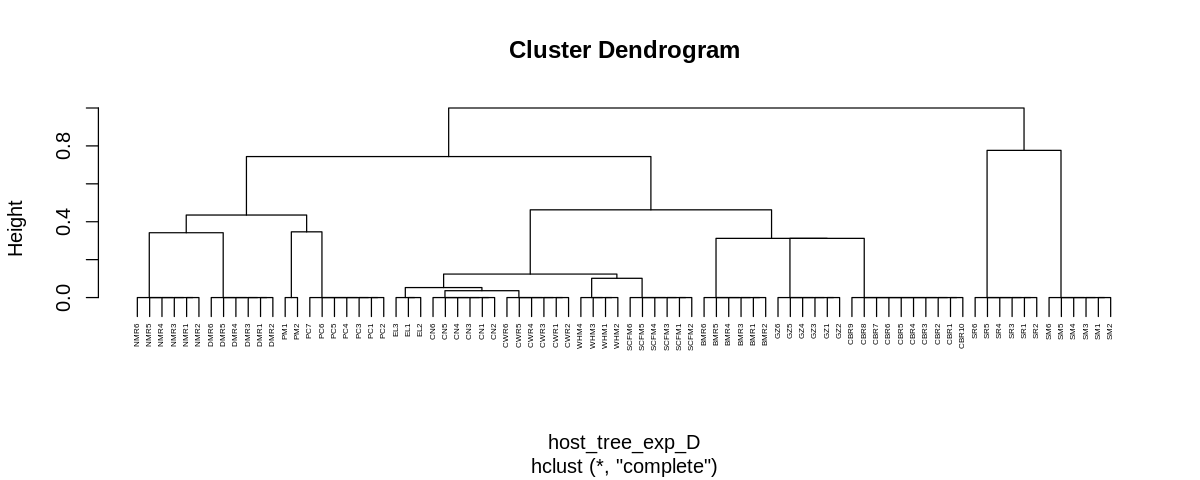

In [5]:
host_tree_exp_D = host_tree_exp %>% cophenetic %>% as.dist %>% rescale_dist_mtx 
host_tree_exp_D
options(repr.plot.width=10, repr.plot.height=4)
plot(hclust(host_tree_exp_D), cex=0.4)

In [6]:
# writing
saveRDS(host_tree_exp_D,file="host_tree_exp_dist.RDS" )